In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
perch_df = df.loc[df['Species'] == 'Perch']
perch_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [8]:
perch_full = perch_df[['Length2', 'Height', 'Width']]
perch_weight = perch_df[['Weight']]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, test_size=0.2,random_state = 42)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
# PolynomialFeatures = 변수들을 조합하여 여러가지 특성을 새롭게 만드는 라이브러리
poly.get_feature_names_out()

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [17]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(44, 9)

In [21]:
test_poly = poly.transform(test_input)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9901322091078805

In [33]:
#overfitting(과대적합)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(44, 55)

In [34]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999984838

In [35]:
lr.score(test_poly, test_target)

-74.96954266141226

In [37]:
from sklearn.preprocessing import StandardScaler

In [39]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 규제(ridge, lasso)

- 릿지(ridge) : 계수를 제곱한 값을 기준으로 규제
    - L2 noem : 모든계수를 작게 만들지만 0은 되지 않음
- 라쏘(lasso) : 계수의 절댓값을 기준으로 규제
    - L1 norm : 불필요한 특성의 가중치를 0으로 만듬


In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896107802360709

In [41]:
ridge.score(test_scaled, test_target)

0.9787325999385283

In [42]:
import matplotlib.pyplot as plt

In [43]:
train_score = []
test_score = []

In [45]:
# hyperparameter

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [46]:
print(train_score, test_score)

[0.9930298865307144, 0.9918435455847994, 0.9904323365615544, 0.9896107802360709, 0.9887820597843971, 0.9844879679766693] [0.9661953270989696, 0.9808462591985794, 0.9828106846917636, 0.9787325999385283, 0.9721537859038205, 0.9624060895767066]


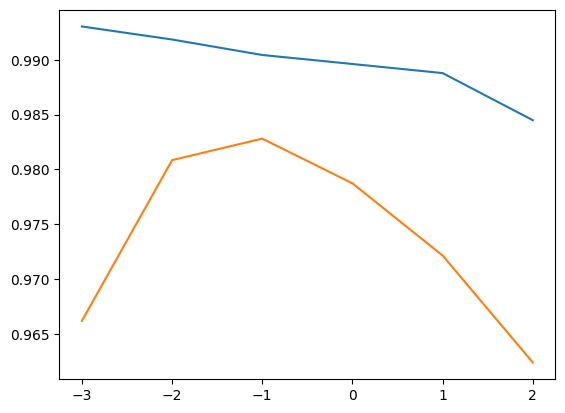

In [47]:
import numpy as np
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [49]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(round(ridge.score(train_scaled, train_target), 4))
print(round(ridge.score(test_scaled, test_target), 4))

0.9904
0.9828


In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

lasso.score(train_scaled, train_target)

0.9897914912373135

In [53]:
lasso.score(test_scaled, test_target)

0.9798501144841094

In [54]:
lasso.coef_

array([1.90006296e-02, 0.00000000e+00, 0.00000000e+00, 9.36851230e+01,
       4.00420791e+00, 0.00000000e+00, 4.60601016e+00, 0.00000000e+00,
       3.62845554e+01, 4.52214643e-01, 2.76675624e+01, 0.00000000e+00,
       2.78663436e+01, 0.00000000e+00, 0.00000000e+00, 1.79770541e+01,
       0.00000000e+00, 0.00000000e+00, 4.23720271e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.84857378e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.24607186e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.37298687e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.18680766e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.45602170e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])